# Problem Statement

The data set consist of various features to identify whether a traffic is a type of attack or normal. The target class consist of different types of attacks smurf, neptune, back, satan, ipsweep, portsweep, warezclient, teardrop, pod, nmap, guess_passwd, buffer_overflow, land, warezmaster, imap, rootkit, loadmodule, ftp_write, multihop, phf, perl, spy. All those attacks are fall into the main categories of


*   DOS: denial-of-service, e.g. syn flood;
*   R2L: unauthorized access from a remote machine, e.g. guessing password;
*   U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
*   probing: surveillance and other probing, e.g., port scanning.



# Setup

In [17]:
import pandas as pd
import os

import numpy as np
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

In [9]:
import pandas as pd

def load_data():
    
    f=open("../input/kdd-cup-1999-data/kddcup.names",'r')
    data=f.readlines()[1:]

    column_names=[]
    for line in data:
        column_names.append(line.split(':')[0])

    column_names.append('target')
    f.close()

    f=open("../input/kdd-cup-1999-data/training_attack_types","r")
    data=f.readlines()[:-1]

    attack_type_mapping={'normal':'normal'}
    for line in data:
        k,v=line.split()
        attack_type_mapping[k]=v

    f.close()

    temp=pd.read_csv('../input/kdd-cup-1999-data/kddcup.data_10_percent.gz',names=column_names)
    temp['target']=temp.target.apply(lambda r: attack_type_mapping[r[:-1]])
    
    return temp

## Take a Quick Look at the Data Structure

In [10]:
ids=load_data()
ids.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [11]:
ids.shape

(494021, 42)

In [12]:
ids.drop_duplicates(inplace=True)

In [13]:
ids.shape

(145585, 42)

In [14]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145585 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  num_compromised              145585 non-null  int64  
 13 

In [15]:
ids.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491493,0.026177,...,181.469416,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,...,99.097409,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Saving figure attribute_histogram_plots


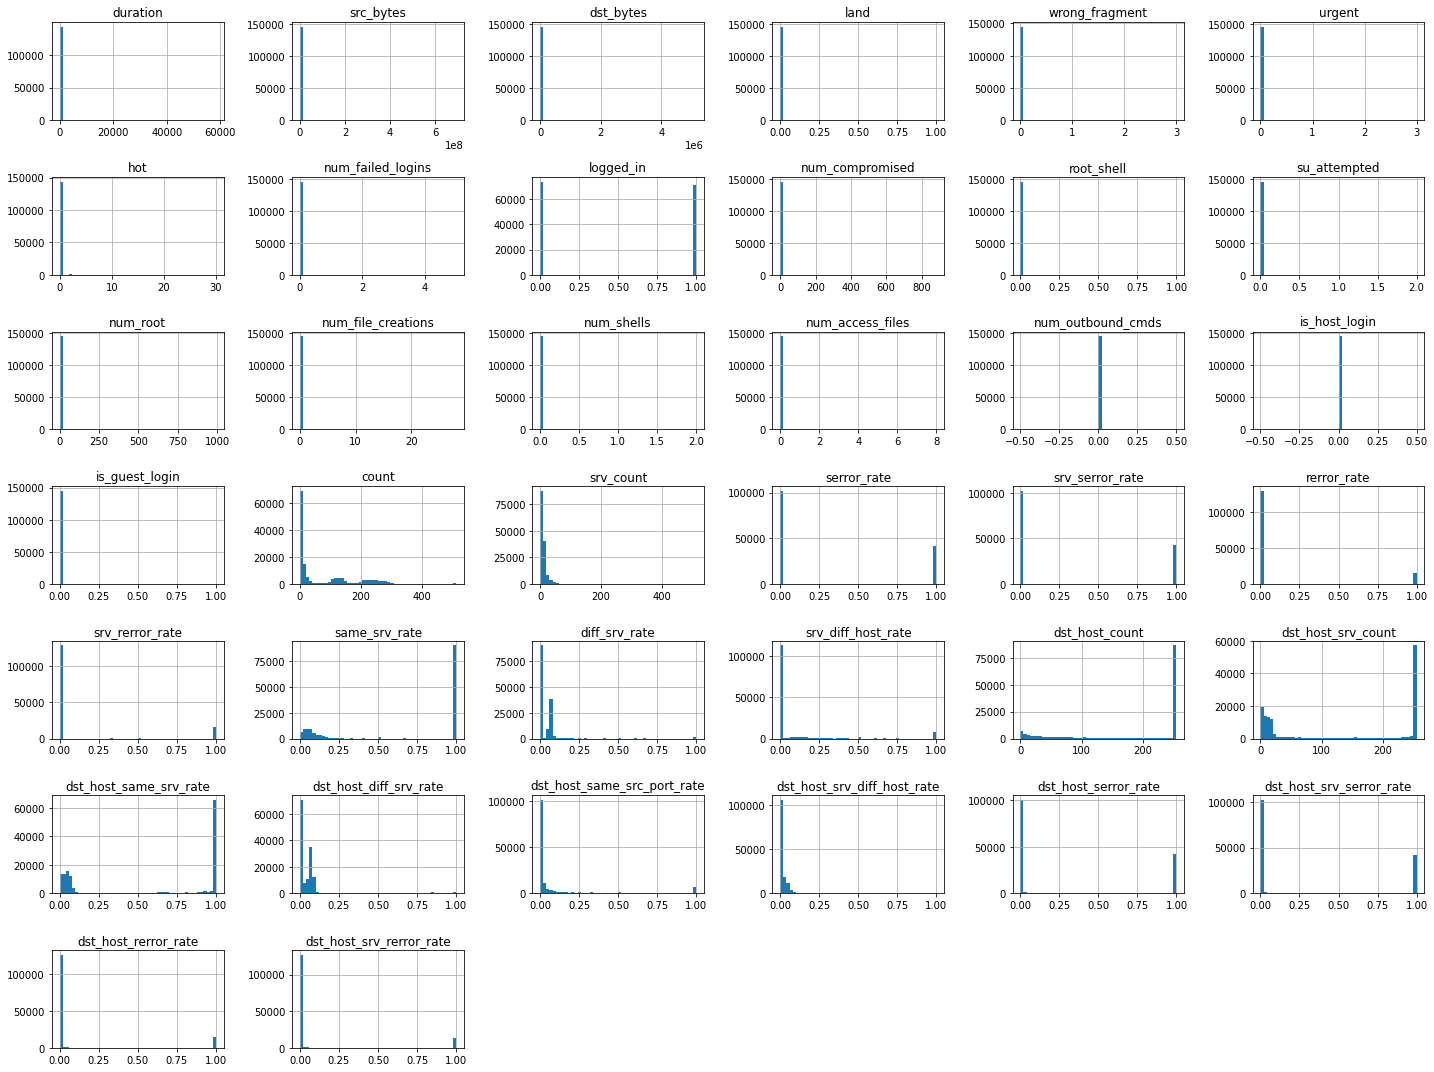

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

ids.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure Categorical Column visualization


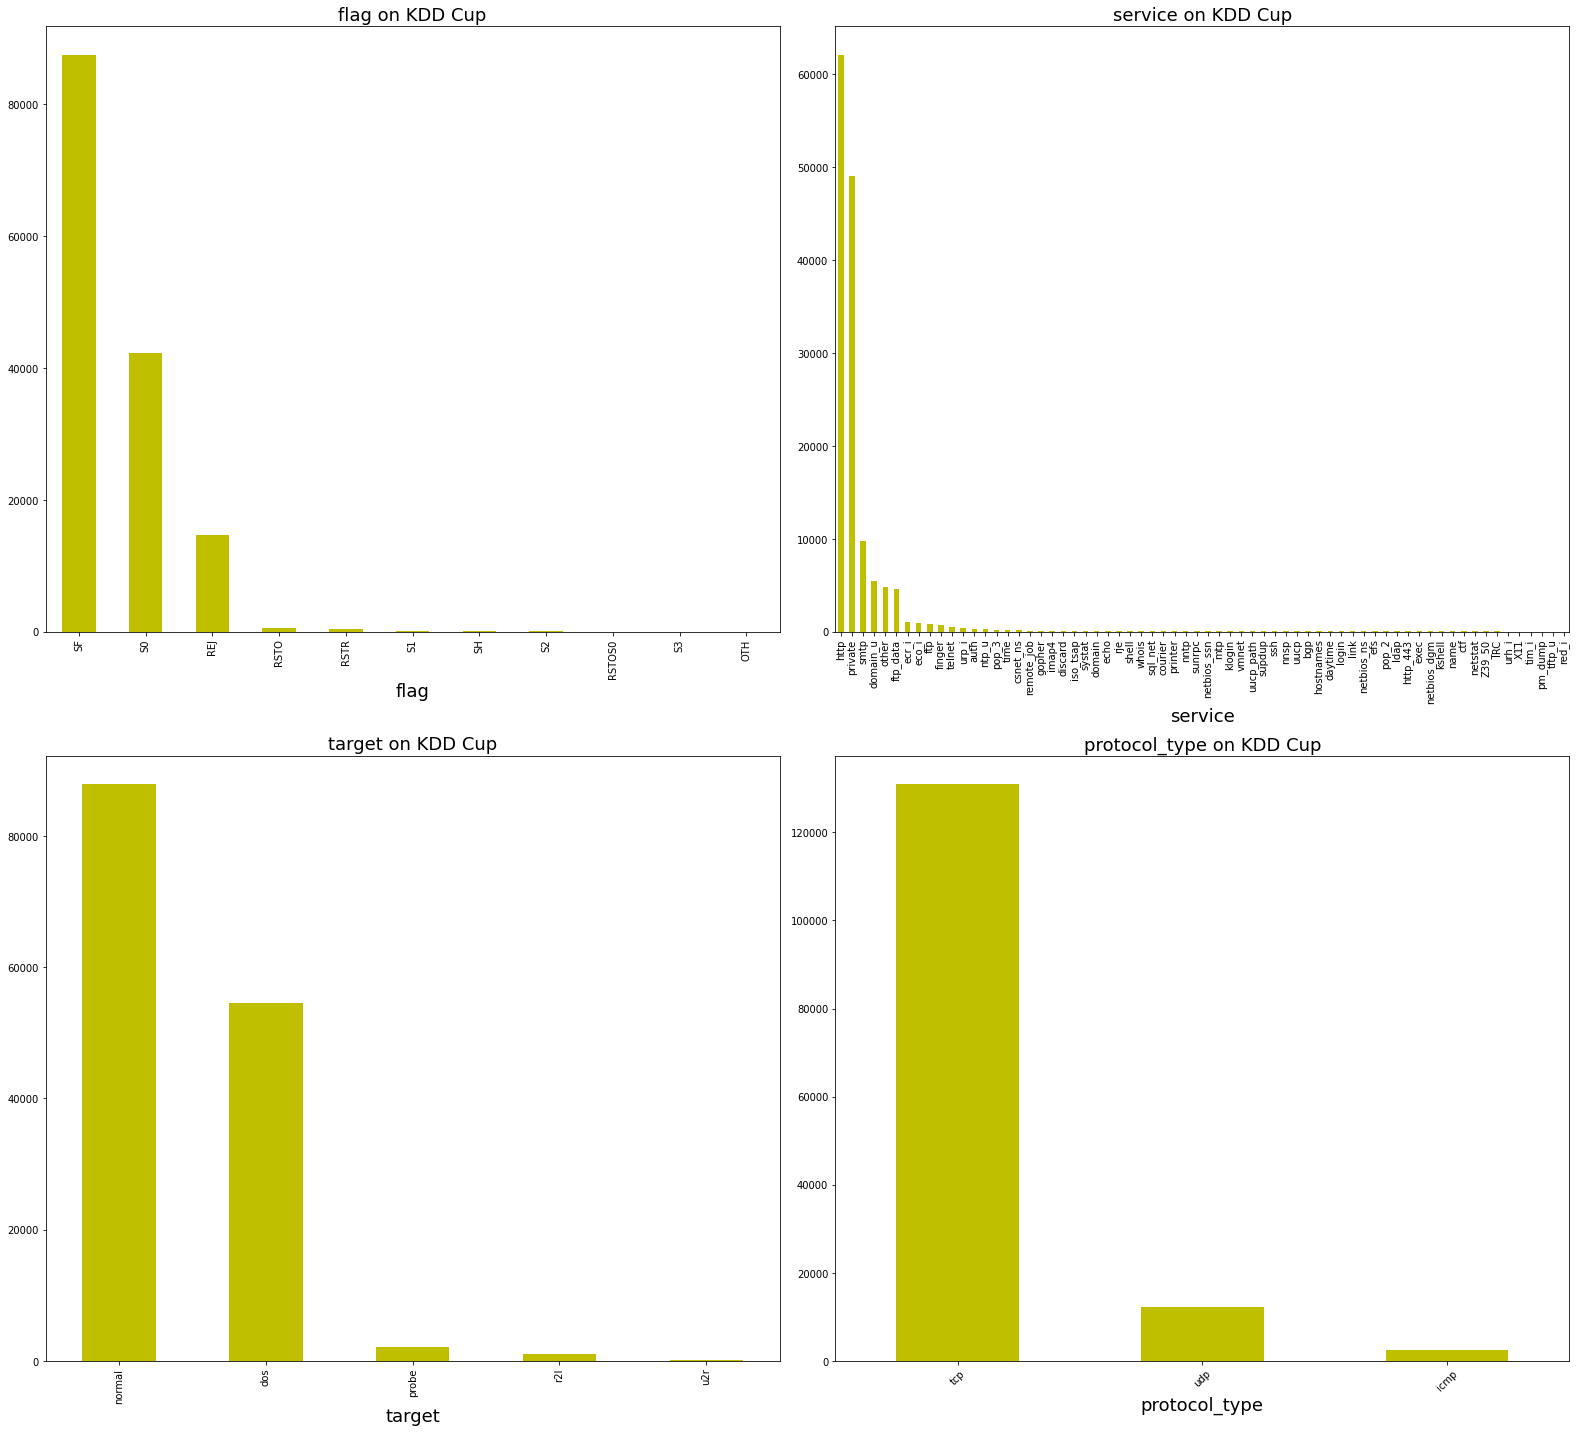

In [19]:
categorical_features = ['flag', 'service', 'target', 'protocol_type']
def plot_dist(col, ax):
    ids[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on KDD Cup".format(col), fontsize= 18)
    plt.xticks(rotation=45)
    return ax

f, ax = plt.subplots(2,2, figsize = (22,20))
f.tight_layout(h_pad=15, w_pad=10, rect=[0, 0.08, 1, 0.93])

k = 0
for i in range(2):
    for j in range(2):
        plot_dist(categorical_features[k], ax[i][j])
        k += 1

save_fig('Categorical Column visualization')
plt.show()

In [20]:
ids['target'].value_counts()

normal    87832
dos       54572
probe      2130
r2l         999
u2r          52
Name: target, dtype: int64

## Create a Validation and Test Set

<AxesSubplot:>

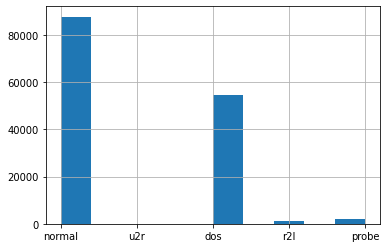

In [21]:
ids['target'].hist()

In [22]:
from sklearn.model_selection import train_test_split

train_set,strat_test_set = train_test_split(ids,test_size=0.2,random_state=7,stratify=ids['target'])
strat_train_set,strat_val_set=train_test_split(train_set,test_size=0.2,random_state=7,stratify=train_set['target'])

In [23]:
strat_test_set["target"].value_counts() / len(strat_test_set)

normal    0.603290
dos       0.374867
probe     0.014631
r2l       0.006869
u2r       0.000343
Name: target, dtype: float64

In [24]:
ids['target'].value_counts() / len(ids)

normal    0.603304
dos       0.374846
probe     0.014631
r2l       0.006862
u2r       0.000357
Name: target, dtype: float64

# Discover and Visualize the Data to Gain Insights

In [25]:
ids = strat_train_set.copy()

## Looking through the data in Deep

Saving figure Protocol_type vs target status


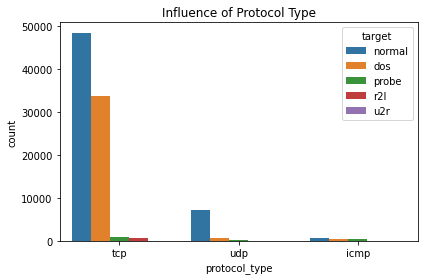

In [26]:
import seaborn as sns

sns.countplot(x = 'protocol_type',hue = "target",data = ids).set(title='Influence of Protocol Type')
save_fig("Protocol_type vs target status")
plt.show()

Most of the UDP protocols denote the normal traffic.

Saving figure Guest Login vs Traffic status


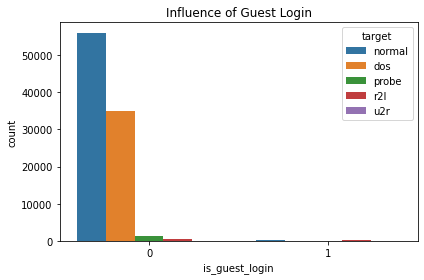

In [27]:
import seaborn as sns

sns.countplot(x = 'is_guest_login',hue = "target",data = ids).set(title='Influence of Guest Login')
save_fig("Guest Login vs Traffic status")
plt.show()

If it is not a guest login then more chance the traffic denotes DOS attack.

Saving figure Land status vs Target


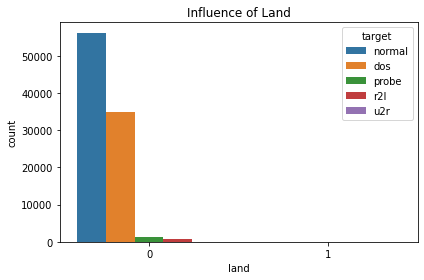

In [28]:
import seaborn as sns

sns.countplot(x = 'land',hue = "target",data = ids).set(title='Influence of Land')
save_fig("Land status vs Target")
plt.show()

## Looking for Correlations

Saving figure Correlation plot of the data


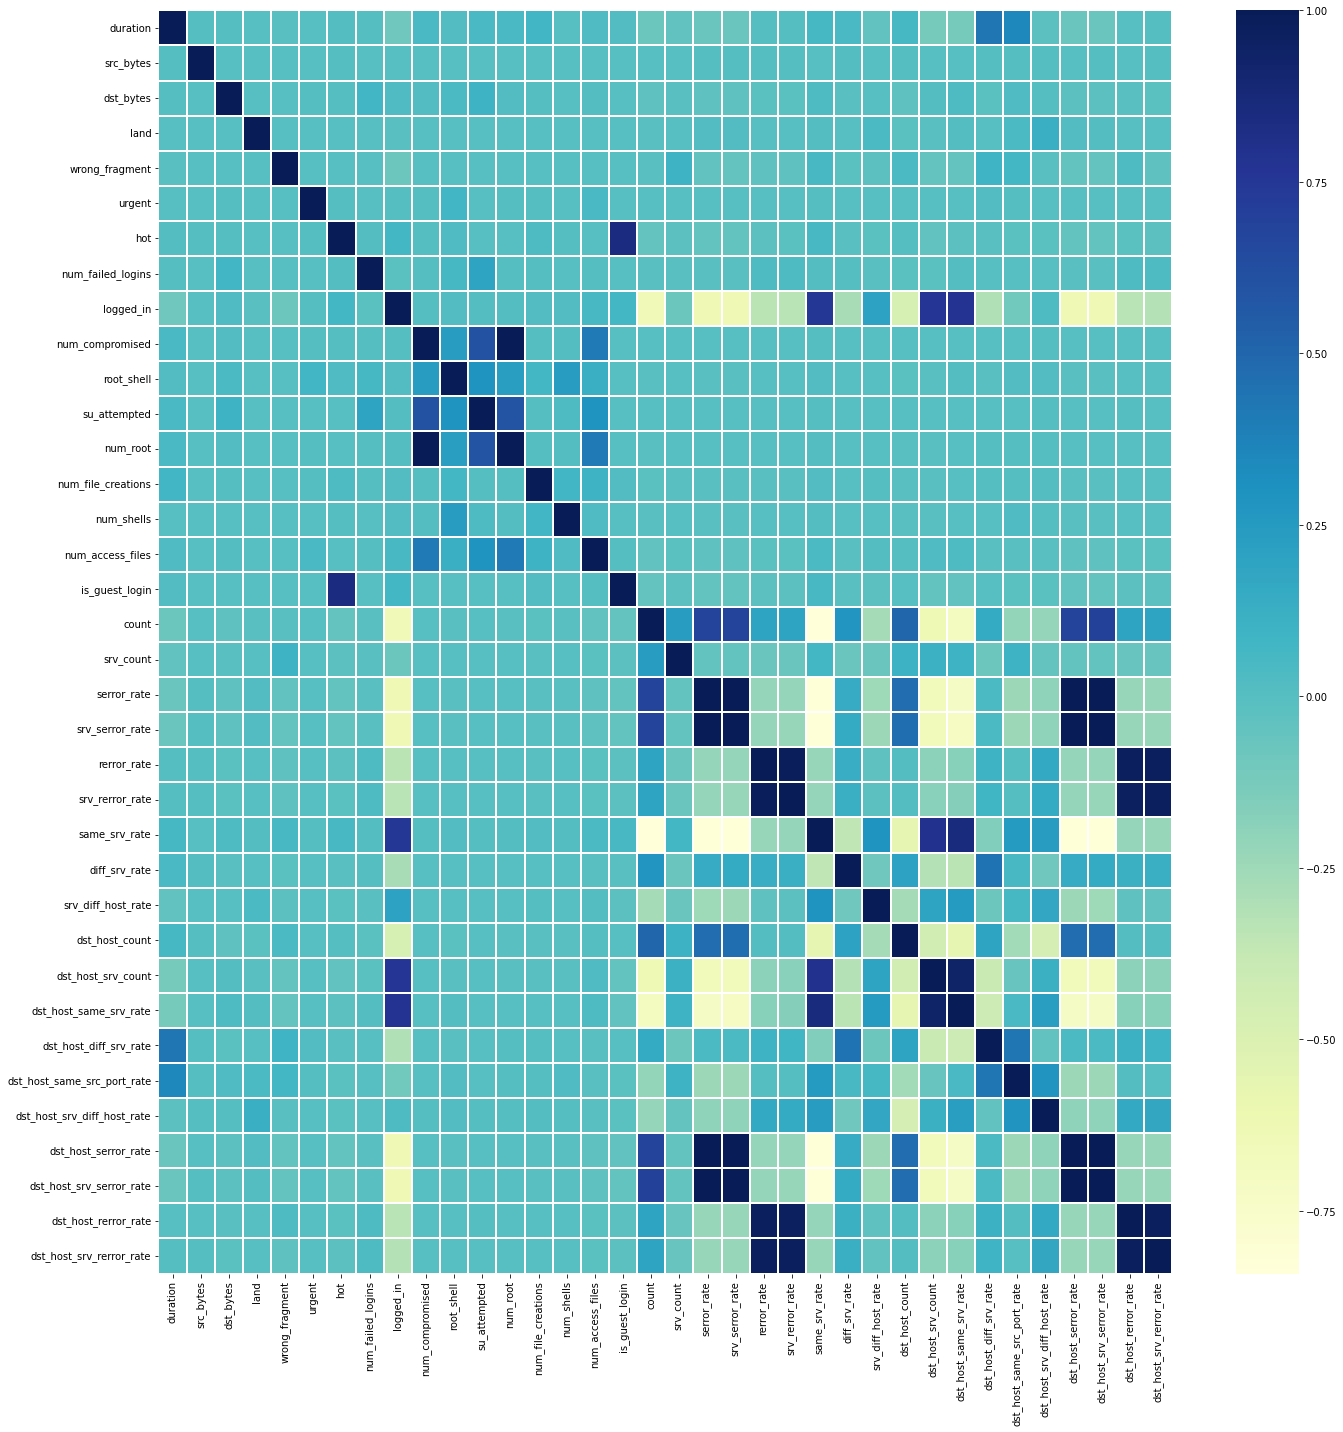

In [29]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(20,20)) 

corr_matrix=ids.drop(['num_outbound_cmds','is_host_login'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)

save_fig('Correlation plot of the data')
plt.show()

In [30]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
ids.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
ids.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
ids.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
ids.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
ids.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
ids.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
ids.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
ids.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

#This variable has zeroes in all the instances so we are ignored for analyzsis.
ids.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [31]:
ids.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
7622,1,tcp,smtp,SF,2252,331,0,0,0,0,...,0.0,1.00,0.00,1.0,5,216,0.00,0.20,0.01,normal
356800,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.05,0.06,0.0,255,1,0.07,0.00,0.00,dos
485733,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.09,0.05,0.0,255,19,0.05,0.00,0.00,dos
51015,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.0,1.00,0.00,0.0,53,53,0.00,0.02,0.00,dos
382524,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.27,0.12,0.0,255,7,0.08,0.00,0.00,dos


# Prepare the Data for ML Algorithms

In [32]:
ids=strat_train_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
ids_labels=strat_train_set['target'].copy()

In [33]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
target_encoder.fit(ids_labels)
ids_labels=target_encoder.transform(ids_labels)

## Data Cleaning

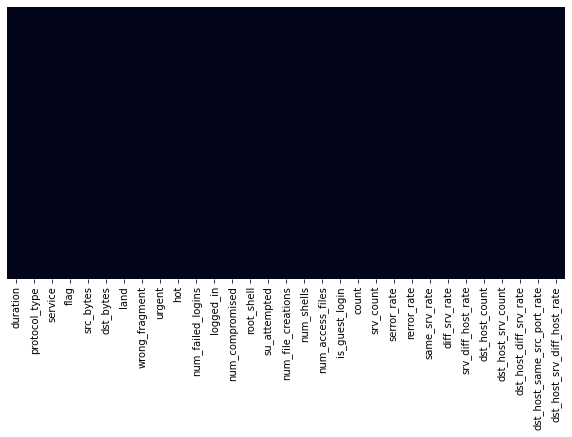

In [34]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(ids.isnull(),yticklabels=False,cbar=False)

plt.show()

## Handling Text and Categorical Attributes

In [35]:
ids_cat=ids[['flag', 'service', 'protocol_type']]
ids_cat.head(10)

,flag,service,protocol_type
7622,SF,smtp,tcp
356800,S0,private,tcp
485733,S0,private,tcp
51015,SF,http,tcp
382524,S0,private,tcp
369770,S0,private,tcp
378992,S0,private,tcp
478119,REJ,private,tcp
114113,S0,private,tcp
452701,SF,http,tcp


In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
ids_cat_1hot = cat_encoder.fit_transform(ids_cat)
ids_cat_1hot

<93174x80 sparse matrix of type '<class 'numpy.float64'>'
	with 279522 stored elements in Compressed Sparse Row format>

In [37]:
ids_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
ids_cat_1hot.shape

(93174, 80)

In [39]:
cat_encoder.categories_

[array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
        'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
        'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
        'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
        'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
       dtype=object),
 array(['icmp', 'tcp', 'udp'], dtype=object)]

## Outlier Detection

In [40]:
ids_num=ids.drop(['flag', 'service','protocol_type'],axis=1)
ids_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
7622,1,2252,331,0,0,0,0,0,1,0,...,0.0,0.0,1.00,0.00,1.0,5,216,0.00,0.20,0.01
356800,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.05,0.06,0.0,255,1,0.07,0.00,0.00
485733,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.09,0.05,0.0,255,19,0.05,0.00,0.00
51015,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,1.00,0.00,0.0,53,53,0.00,0.02,0.00
382524,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.27,0.12,0.0,255,7,0.08,0.00,0.00


In [41]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest()
outlier_pred = isolation_forest.fit_predict(ids_num)

ids_clean = ids[outlier_pred == 1]
ids_labels_clean = ids_labels[outlier_pred == 1]

In [42]:
ids_clean.shape,ids_labels_clean.shape

((86916, 31), (86916,))

## Transformer Pipeline

In [43]:
from sklearn.preprocessing import StandardScaler

standadizer=StandardScaler()
ids_num_tr=standadizer.fit_transform(ids_num)

ids_num_tr

array([[-0.10608033, -0.00375476, -0.04129745, ..., -0.41726102,
         0.44253672, -0.14928139],
       [-0.10688751, -0.00474502, -0.04661261, ...,  0.0590218 ,
        -0.38545094, -0.31297617],
       [-0.10688751, -0.00474502, -0.04661261, ..., -0.077059  ,
        -0.38545094, -0.31297617],
       ...,
       [-0.10688751, -0.00474502, -0.04661261, ...,  0.0590218 ,
        -0.38545094, -0.31297617],
       [-0.10688751, -0.00474502, -0.04661261, ..., -0.0090186 ,
        -0.38545094, -0.31297617],
       [-0.10688751, -0.0046584 , -0.02605854, ..., -0.41726102,
        -0.34405156, -0.14928139]])

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(ids_num)
cat_attribs = ['flag', 'service','protocol_type']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

ids_prepared = full_pipeline.fit_transform(ids_clean)
ids_labels=ids_labels_clean.copy()

In [45]:
ids_prepared.shape

(86916, 106)

In [46]:
from collections import Counter
Counter(ids_labels)

Counter({1: 52899, 0: 33361, 2: 190, 3: 451, 4: 15})

# A Binary Classification Example

In [48]:
ids_bin_labels=(ids_labels==1).astype(int)
#1 denotes the normal 

In [49]:
from sklearn.linear_model import LogisticRegression

sgd_clf=LogisticRegression(penalty='l1',solver='liblinear')
sgd_clf.fit(ids_prepared,ids_bin_labels)

LogisticRegression(penalty='l1', solver='liblinear')

In [50]:
from sklearn.metrics import confusion_matrix

ids_predictions=sgd_clf.predict(ids_prepared)
confusion_matrix(ids_bin_labels,ids_predictions)

array([[33880,   137],
       [   47, 52852]], dtype=int64)

In [52]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)
y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
validation_prediction=sgd_clf.predict(x_val_prepared)

y_val=target_encoder.transform(y_val)
y_bin_val=(y_val==1).astype(int)

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_bin_val,validation_prediction))
print(precision_score(y_bin_val,validation_prediction))
print(recall_score(y_bin_val,validation_prediction))
confusion_matrix(y_bin_val,validation_prediction)

0.9883231733493604
0.9850756775783175
0.9957304490144453


array([[ 9029,   212],
       [   60, 13993]], dtype=int64)

# Select and Train a Model

## SoftmaxRegreesion

In [54]:
from sklearn.linear_model import LogisticRegression

softmax_reg=LogisticRegression(multi_class='multinomial',max_iter=1000)
softmax_reg.fit(ids_prepared,ids_labels)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [55]:
some_data = ids.iloc[:5]
some_labels = ids_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", softmax_reg.predict(some_data_prepared))

Predictions: [1 0 0 1 0]


In [56]:
print("Labels:", list(some_labels))

Labels: [1, 0, 0, 0, 0]


In [57]:
from sklearn.metrics import confusion_matrix

ids_predictions=softmax_reg.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

array([[33346,    15,     0,     0,     0],
       [    9, 52862,     9,    19,     0],
       [    5,    55,   130,     0,     0],
       [    0,    37,     0,   414,     0],
       [    0,     6,     0,     1,     8]], dtype=int64)

## KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier()
neigh_clf.fit(ids_prepared,ids_labels)

KNeighborsClassifier()

Note: The below cell may run for 15 min. More depend on your hardware.

In [60]:
from sklearn.metrics import confusion_matrix

ids_predictions=neigh_clf.predict(ids_prepared)
confusion_matrix(ids_labels,ids_predictions)

KeyboardInterrupt: 

# Evaluate the model using Validation set

In [49]:
x_val=strat_val_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_val=strat_val_set['target'].copy()

x_val_prepared=full_pipeline.transform(x_val)
y_val=target_encoder.transform(y_val)

In [50]:
validation_prediction=softmax_reg.predict(x_val_prepared)

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9794367648321456
0.9782979676704437
0.9794367648321456


array([[ 8565,   153,    12,     2,     0],
       [   24, 13962,    48,    16,     3],
       [   98,    34,   202,     7,     0],
       [   47,    28,     1,    80,     4],
       [    0,     2,     0,     0,     6]])

In [52]:
validation_prediction=neigh_clf.predict(x_val_prepared)

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(y_val,validation_prediction))
print(precision_score(y_val,validation_prediction,average='weighted'))
print(recall_score(y_val,validation_prediction,average='weighted'))
confusion_matrix(y_val,validation_prediction)

0.9728685498411608
0.9712745870471526
0.9728685498411608


array([[ 8470,   261,     1,     0,     0],
       [    1, 14024,    25,     3,     0],
       [    2,   255,    84,     0,     0],
       [    1,    76,     0,    83,     0],
       [    0,     3,     0,     4,     1]])

# Fine Tune The Best Model

The softmax regressor performs better than the knn classifier. So lets tune some of the hyperparameters of softmax regressor using GridSearchCV.

Note : The below cell will take more than 30 min more depending on your hardware.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

params_grid=[
    {
        'penalty' : ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter' : [400]
    },
    {
        'penalty' : ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'multi_class' : ['multinomial'],
        'solver' : ['saga'],
        'max_iter' : [400]
    }
]

grid_search=GridSearchCV(softmax_reg,params_grid,cv=3,verbose=2,n_jobs=-1)
grid_search.fit(ids_prepared,ids_labels)

[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 45.1min finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [400], 'multi_class': ['multinomial'],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'max_iter': [400], 'multi_class': ['multinomial'],
                          'penalty': ['l1'], 'solver': ['saga']}],
             verbose=2)

In [55]:
best_params,best_score=grid_search.best_params_,grid_search.best_score_
best_params,best_score

({'C': 1000,
  'max_iter': 400,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.998195778896161)

# Evaluate on Test set

In [57]:
x_test=strat_test_set.drop(['target','num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate',
                          'dst_host_serror_rate','dst_host_rerror_rate','dst_host_same_srv_rate','num_outbound_cmds','is_host_login'],axis=1)

y_test=strat_test_set['target'].copy()

x_test_prepared=full_pipeline.transform(x_test)
y_test=target_encoder.transform(y_test)

In [59]:
test_prediction=grid_search.best_estimator_.predict(x_test_prepared)
f1_score(y_test,test_prediction,average='weighted')

0.9795950172828095